In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## models from sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## model Evaluation
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

In [211]:
data=pd.read_csv(r"C:\Users\admin\Desktop\sql datafiles\breast_cancer_detection.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [212]:
data.shape

(569, 32)

In [213]:
# checking if the data contains any NULL values

data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [215]:
## describe() shows a range of different metrics about your numerical columns such as mean, max and standard deviation.
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


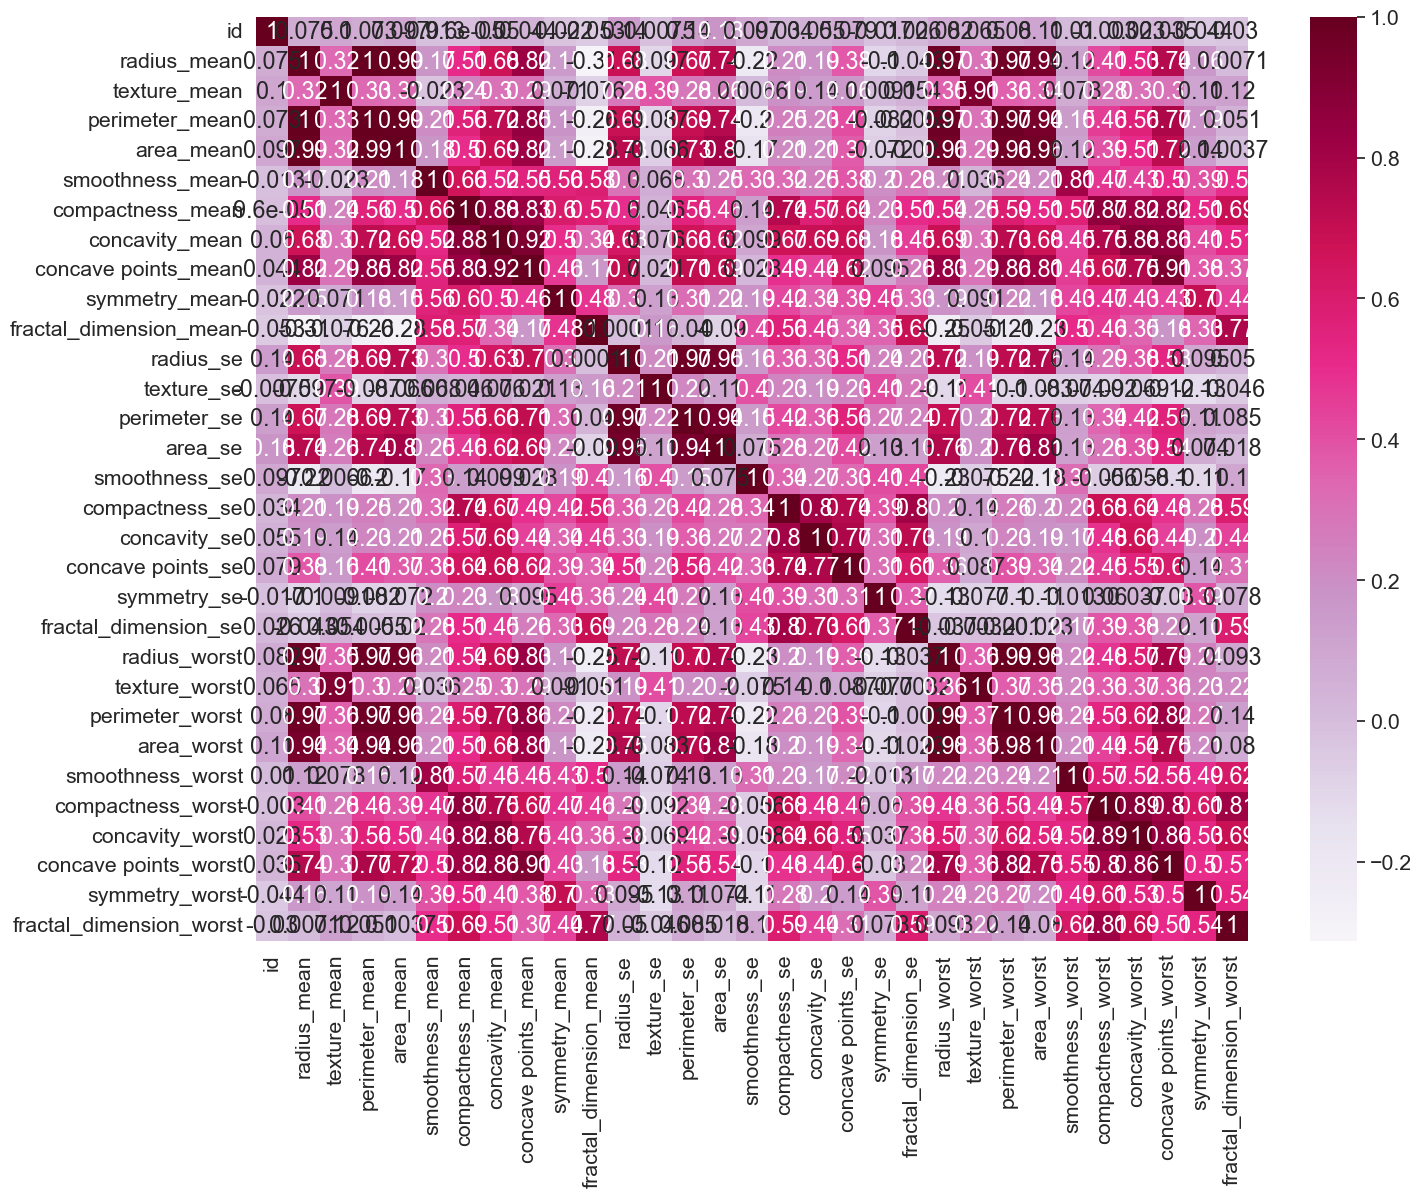

In [216]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(),annot=True, cmap ="PuRd"); 

In [217]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [218]:
data.diagnosis.replace({'B':0,'M':1 },inplace=True)

In [219]:
data=data.drop(['id'],axis=1)

In [220]:
data.select_dtypes(include='object').columns

Index([], dtype='object')

In [221]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size = 0.2)

In [222]:
data_train_x = data_train.iloc[: , 1::]
data_train_y = data_train.iloc[: , 0]

data_test_x = data_test.iloc[: , 1::]
data_test_y = data_test.iloc[: , 0]

## Logistics Regression

In [223]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(data_train_x , data_train_y)
pred_test  = logreg.predict(data_test_x)

mat_test = confusion_matrix(data_test_y , pred_test)
mat_test

array([[63,  1],
       [ 8, 42]], dtype=int64)

In [224]:
lg_acc = accuracy_score(data_test_y , pred_test)
lg_acc

0.9210526315789473

In [225]:
## classification report of Logistics Regression

print(classification_report(data_test_y , pred_test) )

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        64
           1       0.98      0.84      0.90        50

    accuracy                           0.92       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.92      0.92       114



## Decisoin Tree

In [226]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(data_train_x , data_train_y)
pred_test_dt = dt.predict(data_test_x)

mat_dt = confusion_matrix(data_test_y , pred_test_dt)
mat_dt

array([[63,  1],
       [ 5, 45]], dtype=int64)

In [227]:
dt_acc = accuracy_score(data_test_y , pred_test_dt)
dt_acc

0.9473684210526315

In [228]:
## classification report of DecisionTree

print(classification_report(data_test_y , pred_test_dt) )

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        64
           1       0.98      0.90      0.94        50

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



## Random Forest

In [229]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier()

rfc.fit(data_train_x , data_train_y)
pred_test_rfc = rfc.predict(data_test_x)

mat_rfc = confusion_matrix(data_test_y , pred_test_rfc)
mat_rfc

array([[64,  0],
       [ 3, 47]], dtype=int64)

In [230]:
rfc_acc = accuracy_score(data_test_y , pred_test_rfc)
rfc_acc


0.9736842105263158

In [231]:
## classification report of RandomForestClassifier

print(classification_report(data_test_y , pred_test_rfc) )

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        64
           1       1.00      0.94      0.97        50

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### feature selections of the LogisticRegression mode

In [203]:
data_x = data.iloc[:, 1::]
data_y = data.iloc[: , 0]

rfe = RFE(logreg, n_features_to_select = 25 )

rfe.fit(data_x , data_y)

RFE(estimator=LogisticRegression(), n_features_to_select=25)

In [204]:
rfe_feat_imp = pd.DataFrame()
rfe_feat_imp['features'] = data_x.columns
rfe_feat_imp['IMP']      = rfe.support_

rfe_feat_imp = rfe_feat_imp.sort_values('IMP', ascending = False)

## it gives us a variables which are significant 
l1 = list(rfe_feat_imp.features[0:25]) 
l1.append('diagnosis')
data = data.loc[: , l1]


In [205]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size = 0.2)

data_train_x = data_train.iloc[: , 0:-1]
data_train_y = data_train.iloc[: , -1]

data_test_x = data_test.iloc[: , 0:-1]
data_test_y = data_test.iloc[: , -1]

In [206]:
## Implementing machine learning algorithm after feature selection

logreg = LogisticRegression()
logreg.fit(data_train_x , data_train_y)
pred_test_lg  = logreg.predict(data_test_x)

mat_test_lg = confusion_matrix(data_test_y , pred_test_lg)
lg_acc = accuracy_score(data_test_y , pred_test_lg)

print(mat_test_lg)
print("accuracy of the Logistic regression model after feature selection is :", lg_acc)

[[73  1]
 [ 4 36]]
accuracy of the Logistic regression model after feature selection is : 0.956140350877193


In [207]:
## classification report of LogisticRegression after Feature selection

print(classification_report(data_test_y , pred_test_lg) )

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        74
           1       0.97      0.90      0.94        40

    accuracy                           0.96       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



### feature selections of the DecisionTreeClasifier model

In [232]:
rfe = RFE(dt, n_features_to_select = 25)

data_x = data.iloc[:, 1::]
data_y = data.iloc[: , 0]

rfe.fit(data_x , data_y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=25)

In [233]:
rfe_feat_imp = pd.DataFrame()
rfe_feat_imp['features'] = data_x.columns
rfe_feat_imp['IMP']      = rfe.support_

rfe_feat_imp = rfe_feat_imp.sort_values('IMP', ascending = False)

## it gives us a variables which are significant 
l1 = list(rfe_feat_imp.features[0:25]) 
l1.append('diagnosis')
data = data.loc[: , l1]

In [234]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size = 0.2)

data_train_x = data_train.iloc[: , 0:-1]
data_train_y = data_train.iloc[: , -1]

data_test_x = data_test.iloc[: , 0:-1]
data_test_y = data_test.iloc[: , -1]

In [235]:
## Implementing machine learning algorithm after feature selection

dt = DecisionTreeClassifier()
dt.fit(data_train_x , data_train_y)
pred_test_dt  = dt.predict(data_test_x)

mat_test_dt = confusion_matrix(data_test_y , pred_test_dt)
dt_acc = accuracy_score(data_test_y , pred_test_dt)

print(mat_test_dt)
print("accuracy of the Logistic regression model after feature selection is :", dt_acc)

[[72  3]
 [ 3 36]]
accuracy of the Logistic regression model after feature selection is : 0.9473684210526315


In [236]:
## classification report of DecisionTreeClassifier after Feature selection

print(classification_report(data_test_y , pred_test_dt) )

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        75
           1       0.92      0.92      0.92        39

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### feature selections of the RandomForestClassifier model

In [237]:
rfe = RFE(rfc, n_features_to_select = 25)

data_x = data.iloc[:, 0:-1]
data_y = data.iloc[: , -1]

rfe.fit(data_x , data_y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=25)

In [238]:
rfe_feat_imp = pd.DataFrame()
rfe_feat_imp['features'] = data_x.columns
rfe_feat_imp['IMP']      = rfe.support_

rfe_feat_imp = rfe_feat_imp.sort_values('IMP', ascending = False)

## it gives us a those variables which are significant 
l1 = list(rfe_feat_imp.features[0:12]) 
l1.append('diagnosis')
data = data.loc[: , l1]

In [239]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size = 0.2)

data_train_x = data_train.iloc[: , 0:-1]
data_train_y = data_train.iloc[: , -1]

data_test_x = data_test.iloc[: , 0:-1]
data_test_y = data_test.iloc[: , -1]

In [240]:
## Implementing machine learning algorithm after feature selection

rfc = RandomForestClassifier()
rfc.fit(data_train_x , data_train_y)
pred_test_rfc  = rfc.predict(data_test_x)

mat_test_rfc = confusion_matrix(data_test_y , pred_test_rfc)
rfc_acc = accuracy_score(data_test_y , pred_test_rfc)

print(mat_test_rfc)
print("accuracy of the Logistic regression model after feature selection is :", rfc_acc)

[[71  1]
 [ 3 39]]
accuracy of the Logistic regression model after feature selection is : 0.9649122807017544


In [241]:
## classification report of RandomForestClassifier after Feature selection

print(classification_report(data_test_y , pred_test_rfc) )

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

